Text(0, 0.5, 'Neighborhood')

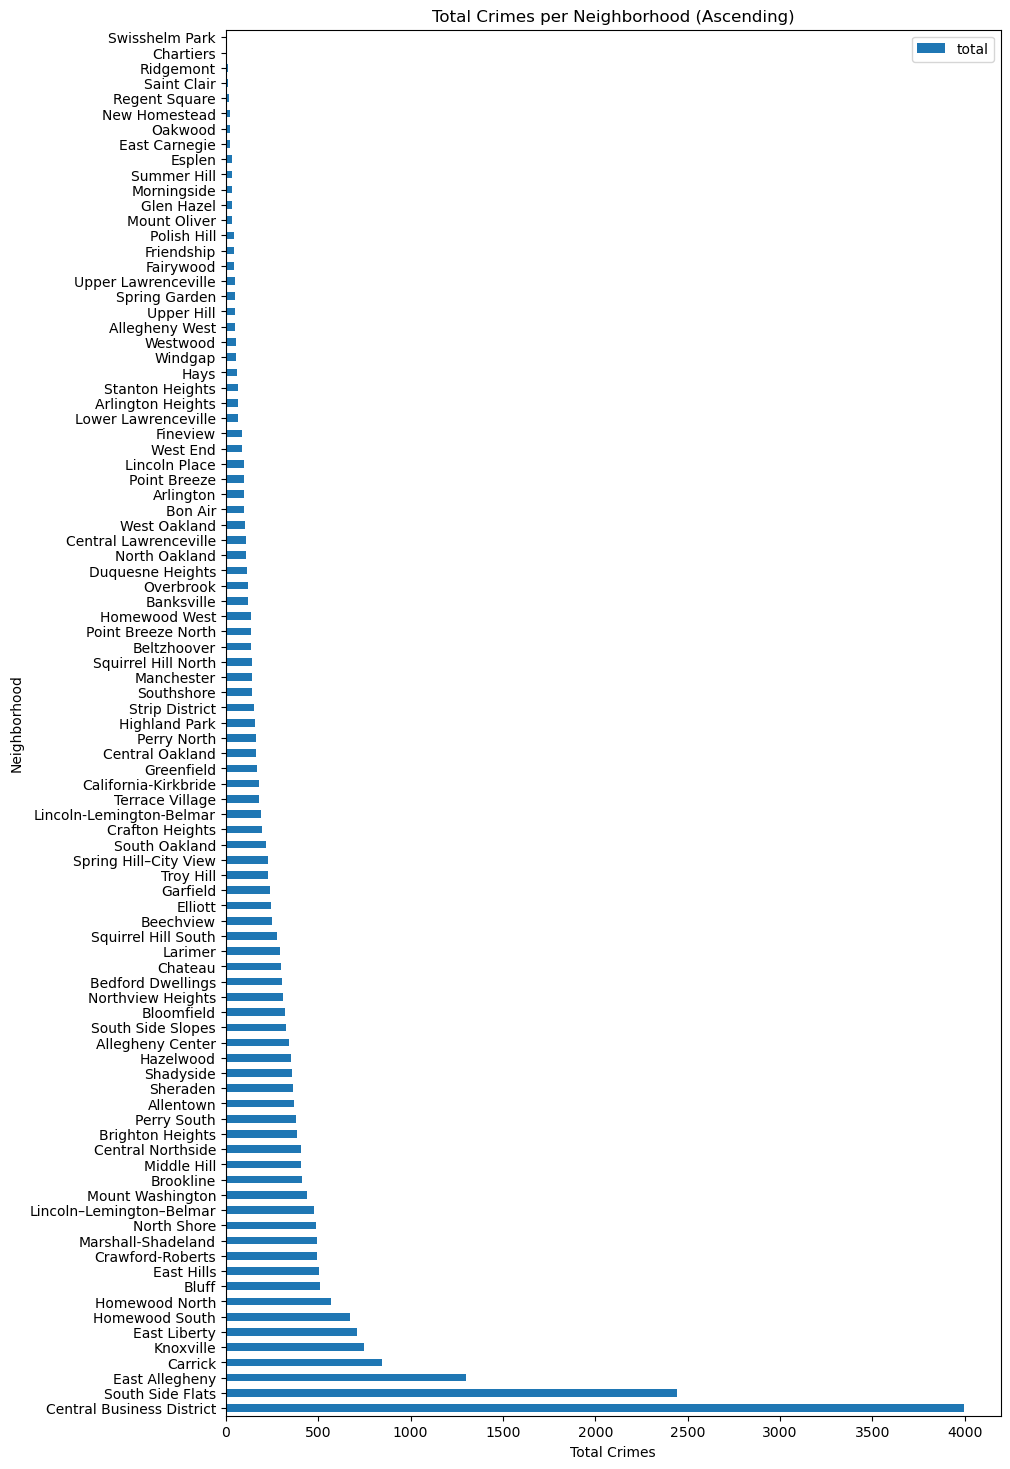

In [6]:
import pandas as pd

df= pd.read_csv("pbp_arrests_2024_jan1_thru_oct31_2025.csv")
crime_levels= (
    df.groupby(['Neighborhood','ArrestCharge_Felony_Misdemeanor_Description']) #this groups the dataset by each neighborhood and the associated levels to the arrests made
        .size() # counts how many arrests in each group
        .unstack(fill_value=0) # gives each offense level it's own column and fills in blank/missing columns with 0
        .reset_index() # turns the index into normal columns
)
crime_levels['total']= crime_levels[['FELONY - F3', 'FELONY - F2','FELONY - F1','MISDEMEANOR - M3', 'MISDEMEANOR - M2', 'MISDEMEANOR - M1', 'INFRACTION - S', 'FELONY', 'MISDEMEANOR', 'INFRACTION']].sum(axis=1)
crime_levels_sorted= crime_levels.sort_values('total', ascending=False)
crime_levels_sorted
# the three rows above help to sort the crime levels and their values into an easily comprehendible form

bg= crime_levels_sorted.plot.barh(
    x='Neighborhood',
    y='total',
    figsize=(10, 18),
    title='Total Crimes per Neighborhood (Ascending)'
)

bg.set_xlabel("Total Crimes")
bg.set_ylabel("Neighborhood")

Conclusion:

As you can see, Swisshelm Park and Chartiers are tied in this graph for the lowest crimes total per neighborhood as they only had 9 total crimes within their neighborhood with no felonies. The Central business district was by far the worst when it comes to just the total crimes within a neighborhood.